# Latihan Studi Kasus Clustering

## Import Library

In [ ]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
 
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

## Data Loading

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# menampilkan informsi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# menampimlkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis

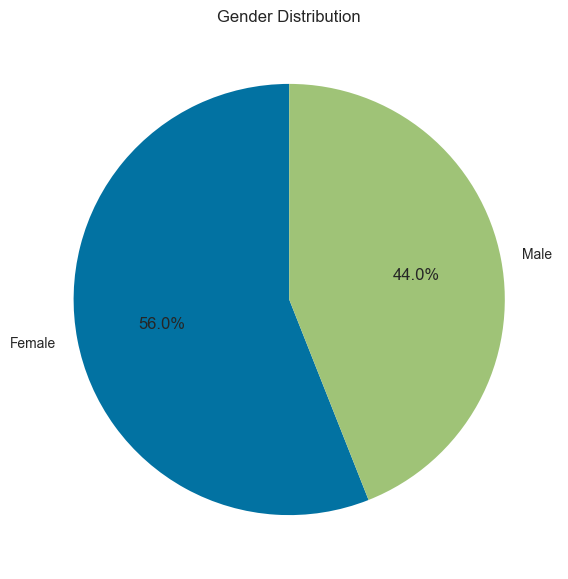

In [6]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi 
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()

untuk menganalisis distribusi usia pelanggan, kita mengelompokkan usia ke dalam beberapa kategori dan menghitung jumlah pelanggan pada setiap kategori. Usia dobagi menjadi lima kategori: 18-25, 26-35, 36-45, 46-55 dan 55 ke atas. 

preoses ini deisebut binning. ini adalah teknik untuk mengelompokkan ke dalam beberapa retang usia yang telah ditentukan, dan jumlah pelanggan pada setiap rentang dihitung. hasilnya kemudian divisualisasikan menggunakan bar chart untuk memudahkan analisis distribusi usia. binning membantu menyederhanakan data dan memudhakan interpretasi pola pola dalam dataset. 


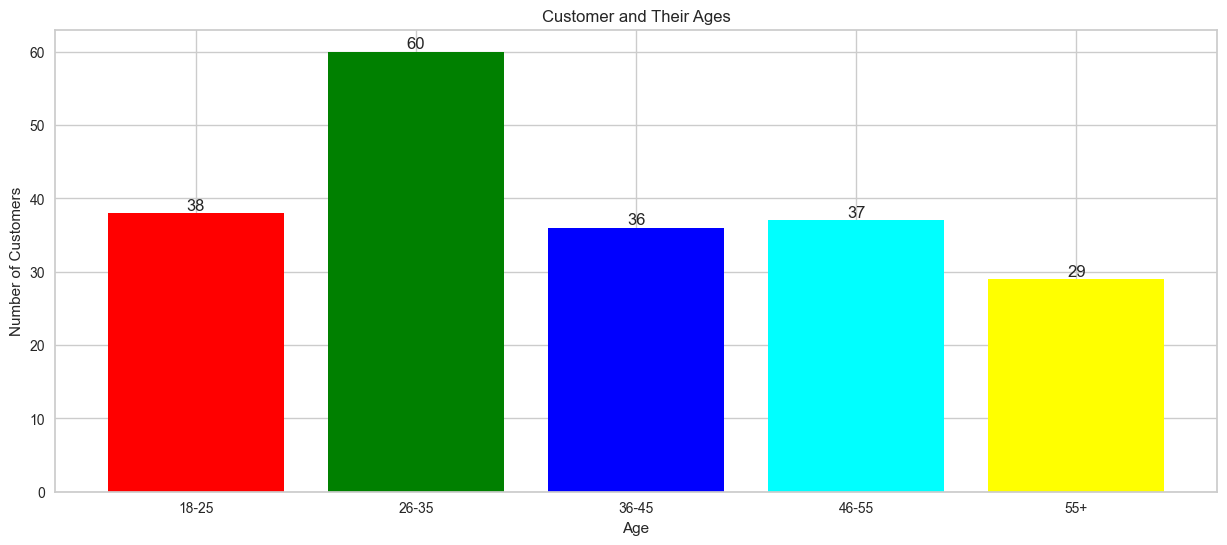

In [7]:
# Mengelompokkan usia lenaggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

# Menyusun data untuk plotting
x = ["18-25", '26-35', '36-45', '46-55', '55+']
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Untuk menganalisis distribusi pendapatan tahunan pelanggan, kita mengelompokkan pendapatan ke dalam beberapa kategori dan menghitung jumlah pelanggan pada setiap kategori. Pendapatan tahunan dikelompokkan ke dalam lima rentang.

1. $0–30,000
2. $30,001–60,000
3. $60,001–90,000
4. $90,001–120,000
5. $120,001–150,000

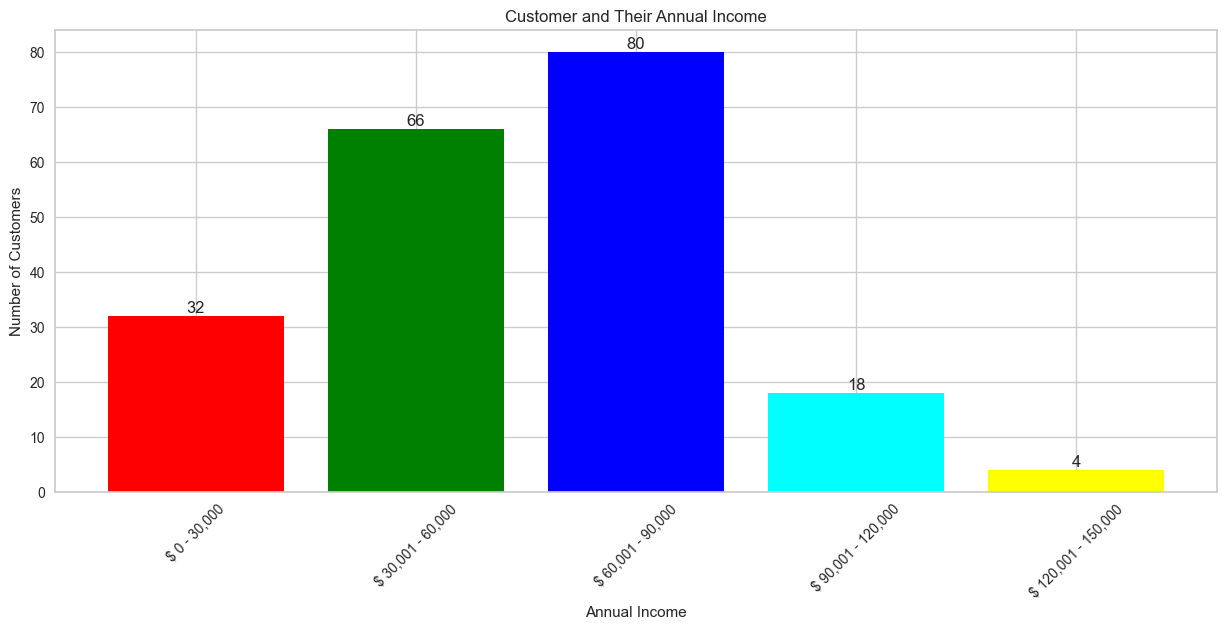

In [8]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitnug jumlah pelanggan di setiap kategori
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

# Menyusun data untuk plotting
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
 
# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
 
plt.show()

Hasil visualisasi menunjukkan distribusi pendapatan tahunan pelanggan sebagai berikut.

- $0–30,000: ada 32 pelanggan dalam rentang pendapatan ini.
- $30,001–60,000: kategori ini memiliki jumlah pelanggan terbanyak, yaitu 66. 
- $60,001–90,000: ada 80 pelanggan dalam rentang pendapatan ini dan menjadikannya kategori dengan jumlah pelanggan terbesar.
- $90,001–120,000: rentang ini memiliki 18 pelanggan.
- $120,001–150,000: kategori ini mencakup 4 pelanggan yang merupakan jumlah paling sedikit di antara semua kategori.

Bar chart ini menunjukkan bahwa pelanggan paling banyak berada dalam rentang pendapatan $60,001–90,000, sedangkan kategori pendapatan tertinggi $120,001–150,000 memiliki jumlah pelanggan yang paling sedikit. Grafik ini memberikan wawasan tentang distribusi pendapatan pelanggan dan dapat membantu dalam merencanakan strategi pemasaran yang lebih efektif.

## Data Splitting


In [9]:
# Mengambil kolom Annual Income dan Spending Score dari dataset dan menyimpannya dalam array x
X = df.iloc[:, [3, 4]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


## Elbow Method

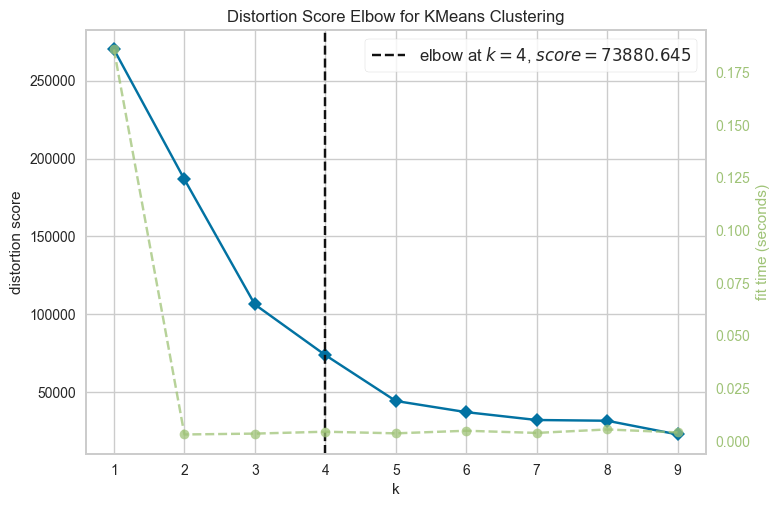

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Inisialisasi model KMeans tanpa parameter awal 
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menetukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visulizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## Cluster Modeling (K-Menas Clustering)

In [11]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4 
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster 
labels = kmeans.labels_

# Meendapatkan jumlah cluster 
k = 4

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k): 
        # Mengambil data untuk cluster saat ini 
        cluster_data = X[labels == cluster_id]

        # Menghitung rata rata untuk setiap fitur dalam cluster 
        mean_income = cluster_data[:, 0].mean()
        mean_spending = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Annual Income (k$): {mean_income:.2f}")
        print(f"Rata-rata Spending Score (1-100): {mean_spending:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Annual Income (k$): 48.26
Rata-rata Spending Score (1-100): 56.48

Cluster 2:
Rata-rata Annual Income (k$): 86.54
Rata-rata Spending Score (1-100): 82.13

Cluster 3:
Rata-rata Annual Income (k$): 87.00
Rata-rata Spending Score (1-100): 18.63

Cluster 4:
Rata-rata Annual Income (k$): 26.30
Rata-rata Spending Score (1-100): 20.91


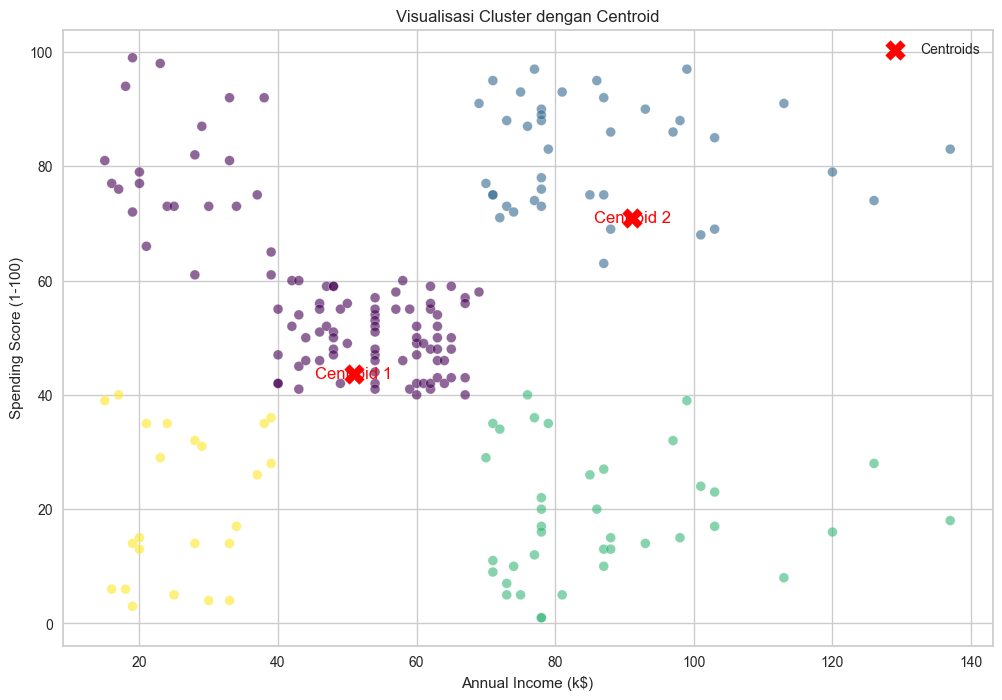

Nilai Centroids:
Centroid 1: Annual Income = 50.91, Spending Score = 43.63
Centroid 2: Annual Income = 91.13, Spending Score = 71.00


In [15]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi clusterr r
plt.figure(figsize=(12, 8))

# Plot data 
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid 
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids): 
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label 
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# Menampilkan nilai centroid 
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

## Evaluasi Model

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42)
silhouette_score(X, kmeans.fit_predict(X))

np.float64(0.39564531743995546)